**Importing the necessary libraries and the dataset**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('hour.csv')

**Getting a look at the data**

In [3]:
df.head(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,1,01-01-2011,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,NaN,NaN,NaN
1,2,01-01-2011,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,NaN,NaN,NaN
2,3,01-01-2011,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,NaN,NaN,NaN
3,4,01-01-2011,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,NaN,NaN,NaN
4,5,01-01-2011,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,NaN,NaN,NaN


**Dropping unecessary columns**

In [4]:
columns_to_drop = ['Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19']
df = df.drop(columns=columns_to_drop)
display(df.head())

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2011,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,01-01-2011,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,01-01-2011,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,01-01-2011,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,01-01-2011,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [5]:
columns_to_drop = ['instant', 'dteday', 'casual', 'registered']
df = df.drop(columns=columns_to_drop)
display(df.head())

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1


**Splitting the data into training and tesing set** <br>
Note that we kept shuffle off in order to keep the data pattern, that is we will train the data to the past earliest data and test on latest data.

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_Train, X_Test, Y_Train, Y_Test = train_test_split(df.drop('cnt', axis=1), df['cnt'], test_size=0.2, shuffle=False)

In [8]:
X_Train.shape

(13903, 12)

In [9]:
Y_Train.shape

(13903,)

**Deep diving and understanding the data**

In [11]:
X_Train.describe(include='all')

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
count,13903.000000,13903.000000,13903.000000,13903.000000,13903.000000,13903.000000,13903.000000,13903.000000,13903.000000,13903.000000,13903.000000,13903.000000
mean,2.263828,0.378192,5.650147,11.546573,0.027404,2.999425,0.684457,1.419981,0.499170,0.478017,0.622996,0.194097
std,1.036254,0.484953,3.218423,6.912235,0.163264,2.005710,0.464749,0.644060,0.197716,0.176614,0.198194,0.123023
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,3.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.470000,0.104500
50%,2.000000,0.000000,5.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.620000,0.194000
75%,3.000000,1.000000,8.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.790000,0.283600
max,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700


In [12]:
X_Train['season'].unique()

array([1, 2, 3, 4])

In [13]:
X_Train['weekday'].unique()

array([6, 0, 1, 2, 3, 4, 5])

In [14]:
X_Train['yr'].unique()

array([0, 1])

In [15]:
X_Train['mnth'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [16]:
X_Train['hr'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

In [17]:
X_Train['holiday'].unique()

array([0, 1])

In [18]:
X_Train['workingday'].unique()

array([0, 1])

In [19]:
X_Train['weathersit'].unique()

array([1, 2, 3, 4])

**Baseline Model** <br>
First we create a baseline model to fail deliberately and get to know how the normal data performs. Also we need justification for all the transformations we do down the road.

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
lin_reg = LinearRegression()
lin_reg.fit(X_Train, Y_Train)

LinearRegression()

Score on training data

In [22]:
from sklearn.metrics import mean_squared_error
base_predictions = lin_reg.predict(X_Train)
lin_mse = mean_squared_error(Y_Train, base_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse.round(3)

np.float64(130.044)

In [23]:
lin_mse = np.array(lin_mse)
lin_mse.round(3)

np.float64(16911.336)

Score on testing data

In [24]:
base_predictions_test = lin_reg.predict(X_Test)
lin_mse_test = mean_squared_error(Y_Test, base_predictions_test)
lin_rmse_test = np.sqrt(lin_mse_test)
lin_rmse_test.round(3)

np.float64(183.278)

In [25]:
lin_mse_test = np.array(lin_mse_test)
lin_mse_test.round(3)

np.float64(33590.769)

**Analyzing the Errors**

1. Hour Residual

In [26]:
residual = Y_Test - base_predictions_test
residual_hr = X_Test['hr']

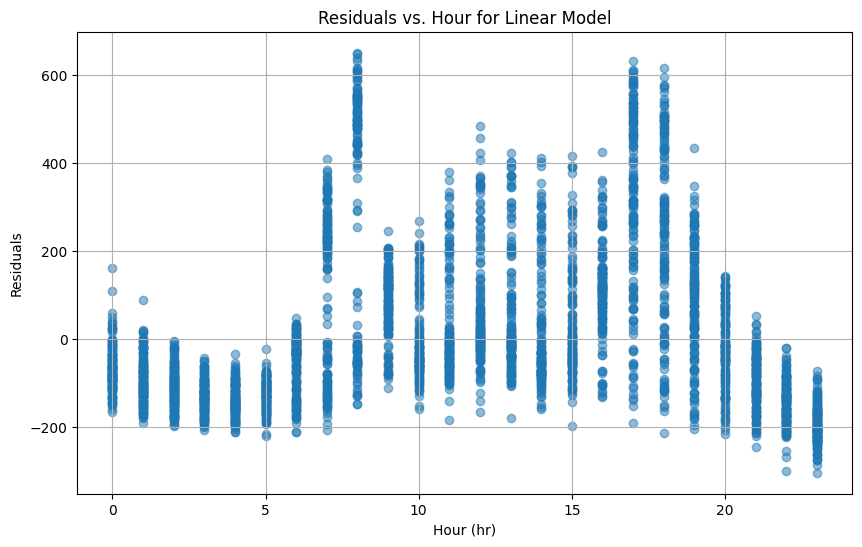

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(residual_hr, residual, alpha=0.5)
plt.xlabel('Hour (hr)')
plt.ylabel('Residuals')
plt.title('Residuals vs. Hour for Linear Model')
plt.grid(True)
plt.show()

2. Coefficient Table

In [28]:
feature_names = X_Train.columns
coefficients = lin_reg.coef_
intercept = lin_reg.intercept_

coeff_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
intercept_df = pd.DataFrame([{'Feature': 'Intercept', 'Coefficient': intercept}])
final_coeff_df = pd.concat([coeff_df, intercept_df], ignore_index=True)
display(final_coeff_df)

,Feature,Coefficient
0,season,8.254586
1,yr,76.802299
2,mnth,2.505504
3,hr,7.248713
4,holiday,-21.159666
5,weekday,1.254928
6,workingday,0.825002
7,weathersit,-5.289152
8,temp,80.060513
9,atemp,214.448589


**Doing the structural changes to our data**

Cyclic transformation function

In [29]:
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin

class CyclicTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, periods):
        self.periods = periods

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = np.asarray(X)
        features = []

        for i, period in enumerate(self.periods):
            features.append(np.sin(2 * np.pi * X[:, i] / period))
            features.append(np.cos(2 * np.pi * X[:, i] / period))

        return np.column_stack(features)

    def get_feature_names_out(self, input_features=None):
        names = []
        for feature in input_features:
            names.append(f"{feature}_sin")
            names.append(f"{feature}_cos")
        return np.array(names)

Creating a column transformer for different types of columns

In [30]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Cyclic columns must be in this exact order
cyclic_columns = ['hr', 'mnth', 'weekday']
cyclic_periods = [24, 12, 7]

categorical_columns = ['season', 'weathersit', 'yr']
numerical_columns = ['temp', 'atemp', 'hum', 'windspeed']
binary_columns = ['holiday', 'workingday']

preprocessor = ColumnTransformer(
    transformers=[
        ('cyclic', CyclicTransformer(periods=cyclic_periods), cyclic_columns),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_columns),
        ('num', StandardScaler(), numerical_columns),
        ('bin', 'passthrough', binary_columns)
    ],
    remainder='drop'
)

Build the Pipeline

In [31]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

linreg_pipeline = Pipeline(
    steps=[
        ('preprocess', preprocessor),
        ('model', LinearRegression())
    ]
)

**Regression Models**

1. Using Plain Regression

In [32]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
linreg_pipeline.fit(X_Train, Y_Train)

new_base_predictions = linreg_pipeline.predict(X_Train)
new_base_predictions_test = linreg_pipeline.predict(X_Test)

new_rmse = np.sqrt(mean_squared_error(Y_Train, new_base_predictions))
new_rmse_test = np.sqrt(mean_squared_error(Y_Test, new_base_predictions_test))

train_mae = mean_absolute_error(Y_Train, new_base_predictions)
test_mae = mean_absolute_error(Y_Test, new_base_predictions_test)

print(f"Train RMSE: {new_rmse:.3f}, Train MAE: {train_mae:.3f}")
print(f"Test RMSE:  {new_rmse_test:.3f}, Test MAE:  {test_mae:.3f}")

Train RMSE: 116.871, Train MAE: 85.329
Test RMSE:  164.409, Test MAE:  120.741


We see how the transformations have helped the model, but does'nt seem quite upto the mark yet. Let's try with Ridge Regression.

2. Using Ridge Regression

In [33]:
from sklearn.linear_model import Ridge

ridge_pipeline = Pipeline(
    steps=[
        ('preprocess', preprocessor),
        ('model', Ridge(alpha=1.0))
    ]
)

ridge_pipeline.fit(X_Train, Y_Train)

new_base_predictions = ridge_pipeline.predict(X_Train)
new_base_predictions_test = ridge_pipeline.predict(X_Test)

new_rmse = np.sqrt(mean_squared_error(Y_Train, new_base_predictions))
new_rmse_test = np.sqrt(mean_squared_error(Y_Test, new_base_predictions_test))

train_mae = mean_absolute_error(Y_Train, new_base_predictions)
test_mae = mean_absolute_error(Y_Test, new_base_predictions_test)

print(f"Train RMSE: {new_rmse:.3f}, Train MAE: {train_mae:.3f}")
print(f"Test RMSE:  {new_rmse_test:.3f}, Test MAE:  {test_mae:.3f}")

Train RMSE: 116.871, Train MAE: 85.327
Test RMSE:  164.414, Test MAE:  120.737


Almost negligible change from the previous model, it's because of the non-linearity of the data these models fail. They cannot capture the structure of the data to justify their behaviour. Now pivoting to the models wich can capure. Enter decision trees!

**Decision Tree Regression**

1. Plain Model

In [34]:
from sklearn.tree import DecisionTreeRegressor

tree_pipeline = Pipeline(
    steps=[
        ('preprocess', preprocessor),
        ('model', DecisionTreeRegressor(
            max_depth=8,
            min_samples_leaf=50,
            random_state=42
        ))
    ]
)

tree_pipeline.fit(X_Train, Y_Train)

new_base_predictions = tree_pipeline.predict(X_Train)
new_base_predictions_test = tree_pipeline.predict(X_Test)

new_rmse = np.sqrt(mean_squared_error(Y_Train, new_base_predictions))
new_rmse_test = np.sqrt(mean_squared_error(Y_Test, new_base_predictions_test))

train_mae = mean_absolute_error(Y_Train, new_base_predictions)
test_mae = mean_absolute_error(Y_Test, new_base_predictions_test)

print(f"Train RMSE: {new_rmse:.3f}, Train MAE: {train_mae:.3f}")
print(f"Test RMSE:  {new_rmse_test:.3f}, Test MAE:  {test_mae:.3f}")

Train RMSE: 60.390, Train MAE: 38.855
Test RMSE:  103.492, Test MAE:  68.102


There's a significant increase in the results. This baseline model was mean to get the understanding of where we stand. Let's tune in more to optimize it.

2. Random Forrest

In [35]:
from sklearn.ensemble import RandomForestRegressor

rf_pipeline = Pipeline(
    steps=[
        ('preprocess', preprocessor),
        ('model', RandomForestRegressor(
            n_estimators=200,
            max_depth=12,
            min_samples_leaf=30,
            n_jobs=-1,
            random_state=42
        ))
    ]
)

rf_pipeline.fit(X_Train, Y_Train)

new_base_predictions = rf_pipeline.predict(X_Train)
new_base_predictions_test = rf_pipeline.predict(X_Test)

new_rmse = np.sqrt(mean_squared_error(Y_Train, new_base_predictions))
new_rmse_test = np.sqrt(mean_squared_error(Y_Test, new_base_predictions_test))

train_mae = mean_absolute_error(Y_Train, new_base_predictions)
test_mae = mean_absolute_error(Y_Test, new_base_predictions_test)

print(f"Train RMSE: {new_rmse:.3f}, Train MAE: {train_mae:.3f}")
print(f"Test RMSE:  {new_rmse_test:.3f}, Test MAE:  {test_mae:.3f}")

Train RMSE: 50.609, Train MAE: 31.759
Test RMSE:  92.450, Test MAE:  62.613


The ensemble model obviously beats the plain model as expected. Let's go even further.

3. Gradient Boosting

In [36]:
from scipy.linalg.blas import get_blas_funcs
from sklearn.ensemble import GradientBoostingRegressor

gb_pipeline = Pipeline(
    steps=[
        ('preprocess', preprocessor),
        ('model', GradientBoostingRegressor(
            n_estimators=300,
            learning_rate=0.05,
            max_depth=4,
            min_samples_leaf=30,
            random_state=42
        ))
    ]
)

gb_pipeline.fit(X_Train, Y_Train)

new_base_predictions = gb_pipeline.predict(X_Train)
new_base_predictions_test = gb_pipeline.predict(X_Test)

new_rmse = np.sqrt(mean_squared_error(Y_Train, new_base_predictions))
new_rmse_test = np.sqrt(mean_squared_error(Y_Test, new_base_predictions_test))

train_mae = mean_absolute_error(Y_Train, new_base_predictions)
test_mae = mean_absolute_error(Y_Test, new_base_predictions_test)

print(f"Train RMSE: {new_rmse:.3f}, Train MAE: {train_mae:.3f}")
print(f"Test RMSE:  {new_rmse_test:.3f}, Test MAE:  {test_mae:.3f}")

Train RMSE: 42.147, Train MAE: 28.766
Test RMSE:  85.488, Test MAE:  59.213


Yeah, even better.

**Analysis of the Gradient Model**

In [37]:
gb_predictions_test = gb_pipeline.predict(X_Test)

In [38]:
gb_residual = Y_Test - gb_predictions_test

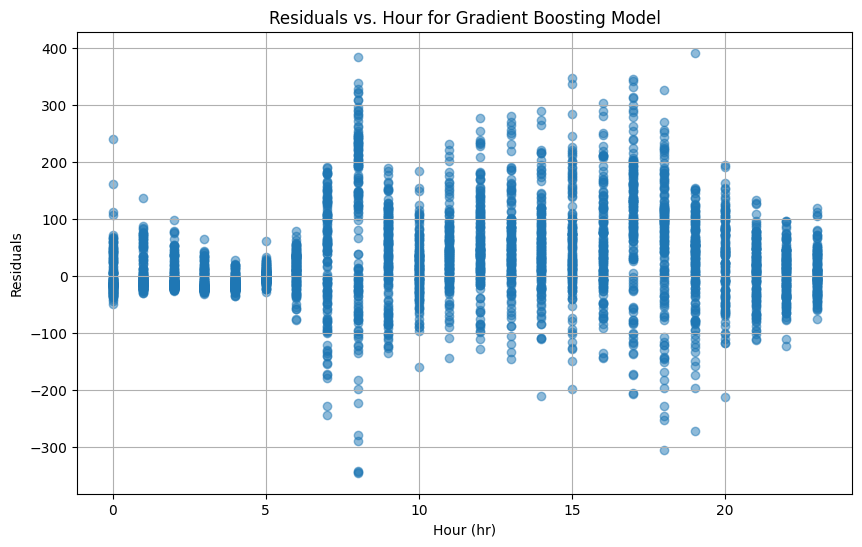

In [39]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(X_Test['hr'], gb_residual, alpha=0.5)
plt.xlabel('Hour (hr)')
plt.ylabel('Residuals')
plt.title('Residuals vs. Hour for Gradient Boosting Model')
plt.grid(True)
plt.show()

We can see how it captures the structure of hour distribution which the linear model failed to do.

Analyzing the Feature Importance of Gradient Boosting

In [40]:
gb_model = gb_pipeline.named_steps['model']
feature_names = preprocessor.get_feature_names_out()

fi = pd.DataFrame({
    'feature': feature_names,
    'importance': gb_model.feature_importances_
}).sort_values(by='importance', ascending=False)

display(fi)

,feature,importance
1,cyclic__hr_cos,0.309173
0,cyclic__hr_sin,0.278134
17,num__atemp,0.135923
21,bin__workingday,0.102137
15,cat__yr_1,0.039021
14,cat__yr_0,0.037371
16,num__temp,0.027864
18,num__hum,0.015027
6,cat__season_1,0.013321
12,cat__weathersit_3,0.012608


Enough reasons to believe that this is our best model.

**Finding the best parameters by tuning it**

In [41]:
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.metrics import make_scorer, mean_squared_error

# RMSE scorer (negative because sklearn maximizes)
rmse_scorer = make_scorer(
    lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred)),
    greater_is_better=False
)

gb_pipeline = Pipeline(
    steps=[
        ('preprocess', preprocessor),
        ('model', GradientBoostingRegressor(random_state=42))
    ]
)

# Parameter grid (paired, disciplined)
param_grid = {
    'model__learning_rate': [0.1, 0.05, 0.03],
    'model__n_estimators': [200, 400, 600],
    'model__max_depth': [3, 4],
    'model__min_samples_leaf': [20, 30, 50]
}

# Time-aware CV
tscv = TimeSeriesSplit(n_splits=3)

# Grid search
grid_search = GridSearchCV(
    gb_pipeline,
    param_grid=param_grid,
    scoring=rmse_scorer,
    cv=tscv,
    n_jobs=-1,
    verbose=2
)

# Fit on training data only
grid_search.fit(X_Train, Y_Train)

# Best model
best_gb = grid_search.best_estimator_

print("Best parameters:")
print(grid_search.best_params_)

print(f"Best CV RMSE: {-grid_search.best_score_:.3f}")

Fitting 3 folds for each of 54 candidates, totalling 162 fits
Best parameters:
{'model__learning_rate': 0.1, 'model__max_depth': 4, 'model__min_samples_leaf': 30, 'model__n_estimators': 600}
Best CV RMSE: 76.211


Predicting the Test Data

In [42]:
y_test_pred = best_gb.predict(X_Test)
test_rmse = np.sqrt(mean_squared_error(Y_Test, y_test_pred))

print(f"Tuned GB Test RMSE: {test_rmse:.3f}")

Tuned GB Test RMSE: 77.595


**Trying out XG Boost**

In [45]:
from xgboost import XGBRegressor

xgb_pipeline = Pipeline(
    steps=[
        ('preprocess', preprocessor),
        ('model', XGBRegressor(
            n_estimators=600,
            learning_rate=0.05,
            max_depth=4,
            min_child_weight=30,
            subsample=0.8,
            colsample_bytree=0.8,
            objective='reg:squarederror',
            random_state=42,
            n_jobs=-1
        ))
    ]
)

xgb_pipeline.fit(X_Train, Y_Train)

new_base_predictions = xgb_pipeline.predict(X_Train)
new_base_predictions_test = xgb_pipeline.predict(X_Test)

new_rmse = np.sqrt(mean_squared_error(Y_Train, new_base_predictions))
new_rmse_test = np.sqrt(mean_squared_error(Y_Test, new_base_predictions_test))

train_mae = mean_absolute_error(Y_Train, new_base_predictions)
test_mae = mean_absolute_error(Y_Test, new_base_predictions_test)

print(f"Train RMSE: {new_rmse:.3f}, Train MAE: {train_mae:.3f}")
print(f"Test RMSE:  {new_rmse_test:.3f}, Test MAE:  {test_mae:.3f}")

Train RMSE: 37.507, Train MAE: 25.349
Test RMSE:  78.989, Test MAE:  54.730


Causes overfitting so we roll back to our tuned GB model

**Saving the Model**

In [46]:
import joblib

joblib.dump(best_gb, 'bike-rental-hourly.joblib')
print("Model 'bike-rental-hourly.joblib' saved successfully!")

Model 'bike-rental-hourly.joblib' saved successfully!


The objective of this project was to predict hourly bike rental demand using historical usage data combined with temporal and weather-related features. Each observation represents total bike rentals within a single hour. The task is inherently challenging due to the stochastic nature of human mobility, strong temporal patterns, and the absence of exogenous signals such as public events or real-time disruptions. <br>
<br>

**Baseline Modeling and Initial Diagnosis**

A linear regression model was first implemented as a baseline to establish a reference level of performance. This model yielded a test RMSE of approximately 183 rentals per hour, which was considered high relative to the scale of the target variable.

Residual analysis revealed systematic error patterns, particularly strong underprediction during morning and evening commute hours and overprediction during late-night periods. These structured residuals indicated that the linear model failed to capture cyclic temporal behavior and feature interactions, rather than suffering from random noise or data leakage. <br>
<br>

**Hypothesis-Driven Feature Representation**

Based on diagnostic evidence, it was hypothesized that improper feature representation, rather than model choice, was the primary limitation. To address this, cyclic temporal features (hour, month, weekday) were encoded using sine–cosine transformations to preserve circular continuity. All preprocessing steps were implemented using sklearn pipelines to ensure reproducibility and prevent leakage.

With improved representation, linear models achieved a reduced test RMSE of approximately 164, confirming that feature encoding was a significant contributor to performance. However, further gains plateaued, and regularization (Ridge regression) did not yield meaningful improvement, indicating a capacity ceiling for linear models. <br>
<br>

**Model Class Transition and Non-Linear Learning**

Given the persistence of residual structure and the limitations of linear models, the modeling approach was shifted to tree-based methods capable of capturing non-linear relationships and feature interactions.

A decision tree regressor produced a substantial performance gain, reducing test RMSE to approximately 103, confirming the importance of interaction effects such as hour × working day and threshold-based weather impacts. To address variance, Random Forest regression was introduced, further reducing test RMSE to approximately 92 through ensemble averaging.

Subsequently, Gradient Boosting Regression was applied to reduce residual bias. An untuned model achieved a test RMSE of approximately 85, demonstrating improved handling of complex residual patterns. <br>
<br>

**Controlled Optimization and Model Selection**

Gradient Boosting was then tuned using time-aware cross-validation, optimizing learning rate, tree depth, number of estimators, and leaf size. This resulted in a final test RMSE of approximately 77.6, representing a substantial and generalizable improvement over all previous models.

XGBoost was evaluated as a higher-capacity alternative; however, despite lower training error, it produced worse test performance due to increased variance. As a result, tuned Gradient Boosting was selected as the final model based on empirical generalization performance rather than algorithmic reputation. <br>
<br>

**Interpretation and Error Characteristics**

Feature importance analysis confirmed that cyclic hour representations dominated predictive power, followed by apparent temperature, working day indicators, and yearly trends. Residual diagnostics showed that systematic temporal bias had been largely eliminated, with remaining errors attributable to heteroskedastic noise and unobserved external factors.

The final model's error of approximately 77 rentals per hour reflects uncertainty inherent in aggregate human behavior rather than modeling deficiencies. Given peak hourly demand often exceeding several hundred rentals, this level of error is consistent with industry expectations for urban demand forecasting without real-time or event-level data. <br>
<br>


**Conclusion**

This project demonstrates a diagnosis-driven modeling workflow, where model complexity was increased only when justified by residual analysis and empirical evidence. Modeling was deliberately stopped once residuals resembled noise and further gains became marginal.

Limitations include the absence of event data, real-time weather signals, and spatial granularity. Future improvements would require additional data sources rather than more complex algorithms.